In [2]:
import re
from tqdm import tqdm
import json 

def get_kmers(sequences, k):
    kmers = {}
    for sequence in sequences:
        if len(sequence) < k:
            continue
        for i in range (0, len(sequence)-k+1):
            kmer = sequence[i:i+k]
            if kmer in kmers:
                kmers[kmer] += 1
            else:
                kmers[kmer] = 1
    return kmers

def strip_tags(sequence):
    sequence = re.sub("<[^>]+>", "", sequence)
    return sequence.replace(" ", "")

In [3]:
filepath_1 = '../../datasets/doggy_data/test_ft_output_10'

filepath_2 = '../../datasets/doggy_data/test_ft_input_10'

# Trim stuff (dirty)
with open(filepath_1, "r") as handle:
    seqs = []
    handle.readline()
    for seq in handle:
        seqs.append(strip_tags(seq).strip("\r\n"))
    kmers_natural = get_kmers(seqs, 1)

with open(filepath_2, "r") as handle:
    seqs = []
    handle.readline()
    for seq in handle:
        seqs.append(strip_tags(seq).strip("\r\n"))
    kmers_de_novo = get_kmers(seqs, 1)
print(kmers_natural)
print(kmers_de_novo)
shared = kmers_natural.keys() & kmers_de_novo.keys()
print(shared)

print(len(shared)/len(kmers_de_novo.keys()))

FileNotFoundError: [Errno 2] No such file or directory: '../../datasets/doggy_data/test_ft_output_10'

Generate natural kmer sets

In [2]:
from tqdm import tqdm
import json 

filepath_1 = '../../datasets/doggy_data/train_pt'
# filepath_2 = '../../datasets/doggy_data/val_pt'
# filepath_3 = '../../datasets/doggy_data/test_pt'

out_path_k = '../../datasets/kmers/kmer_'

raise Exception("Stop here!!! Do not RUN THIS CELL unless you wanna remake the kmers")

for k in range (25, 26):
    with open(filepath_1, "r") as handle:
        seqs = []
        handle.readline()
        for seq in tqdm(handle):
            seqs.append(strip_tags(seq).strip("\r\n"))
        kmers_natural = get_kmers(seqs, k)
    # with open(filepath_2, "r") as handle:
    #     seqs = []
    #     handle.readline()
    #     for seq in tqdm(handle):
    #         seqs.append(strip_tags(seq).strip("\r\n"))
    #     kmers_natural = kmers_natural | get_kmers(seqs, k)
    # with open(filepath_3, "r") as handle:
    #     seqs = []
    #     handle.readline()
    #     for seq in tqdm(handle):
    #         seqs.append(strip_tags(seq).strip("\r\n"))
    #     kmers_natural = kmers_natural | get_kmers(seqs, k)
    out_path = out_path_k + str(k)
    with open(out_path, "w") as handle:
        handle.write(json.dumps(kmers_natural))

Exception: Stop here!!! Do not RUN THIS CELL unless you wanna remake the kmers

Test validation seqs

In [4]:
from tqdm import tqdm
import json 
natural_kmer_path_template = '../../datasets/kmers/kmer_'

# small_ft_full = "../../datasets/outputs/small_ft_full_beam/test/processed"
# # Get generated lines
# all_generated_small_ft_full = []
# with open(small_ft_full, "r") as handle:
#         lines = handle.readlines()
#         for i in range (0, len(lines), 3):
#             generated = lines[i+1].strip()
#             all_generated_small_ft_full.append(generated)

# small_ft = "../../datasets/outputs/small_ft_beam/test/processed"
# # Get generated lines
# all_generated_small_ft = []
# with open(small_ft, "r") as handle:
#         lines = handle.readlines()
#         for i in range (0, len(lines), 3):
#             generated = lines[i+1].strip()
#             if len(generated) > 0:
#                 all_generated_small_ft.append(generated)

small_ft_only = '../../sample_outputs/2024_10_05__18_18_59/t5_baseline_base_ft_full_beam_samples_processed'
# Get generated lines
all_generated_small_ft_only = []
with open(small_ft_only, "r") as handle:
        lines = handle.readlines()
        for i in range (0, len(lines), 3):
            generated = lines[i+1].strip()
            if len(generated) > 0:
                all_generated_small_ft_only.append(generated)

all_natural = []
with open(small_ft_only, "r") as handle:
        lines = handle.readlines()
        for i in range (0, len(lines), 3):
            generated = lines[i].strip()
            if len(generated) > 0:
                all_natural.append(generated)
        
overlap_natural = []
overlap_small_ft_full = []
overlap_small_ft = []
overlap_small_ft_only = []
# for k in range(3, 15):
#     natural_kmer_path = natural_kmer_path_template + str(k)
#     with open(natural_kmer_path, "r") as json_file:
#         kmers_natural = json.load(json_file)
#     overlap_k = []
#     for generated in all_generated_small_ft_full:
#         kmers_de_novo = get_kmers([generated], k)
#         shared = kmers_natural.keys() & kmers_de_novo.keys()
#         overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
#     overlap_small_ft_full.append(overlap_k)

# for k in range(3, 15):
#     natural_kmer_path = natural_kmer_path_template + str(k)
#     with open(natural_kmer_path, "r") as json_file:
#         kmers_natural = json.load(json_file)
#     overlap_k = []
#     for generated in all_generated_small_ft:
#         kmers_de_novo = get_kmers([generated], k)
#         if len(kmers_de_novo.keys()) == 0:
#             continue
#         shared = kmers_natural.keys() & kmers_de_novo.keys()
#         overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
#     overlap_small_ft.append(overlap_k)

for k in range(13, 26):
    natural_kmer_path = natural_kmer_path_template + str(k)
    with open(natural_kmer_path, "r") as json_file:
        kmers_natural = json.load(json_file)
    overlap_k = []
    for generated in all_generated_small_ft_only:
        kmers_de_novo = get_kmers([generated], k)
        if len(kmers_de_novo.keys()) == 0:
            continue
        shared = kmers_natural.keys() & kmers_de_novo.keys()
        overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
    overlap_small_ft_only.append(overlap_k)

for k in range(13, 26):
    natural_kmer_path = natural_kmer_path_template + str(k)
    with open(natural_kmer_path, "r") as json_file:
        kmers_natural = json.load(json_file)
    overlap_k = []
    for generated in all_natural:
        kmers_de_novo = get_kmers([generated], k)
        if len(kmers_de_novo.keys()) == 0:
            continue
        shared = kmers_natural.keys() & kmers_de_novo.keys()
        overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
    overlap_natural.append(overlap_k)
    

[Text(0, 0, '13'),
 Text(1, 0, '14'),
 Text(2, 0, '15'),
 Text(3, 0, '16'),
 Text(4, 0, '17'),
 Text(5, 0, '18'),
 Text(6, 0, '19'),
 Text(7, 0, '20'),
 Text(8, 0, '21'),
 Text(9, 0, '22'),
 Text(10, 0, '23'),
 Text(11, 0, '24'),
 Text(12, 0, '25')]

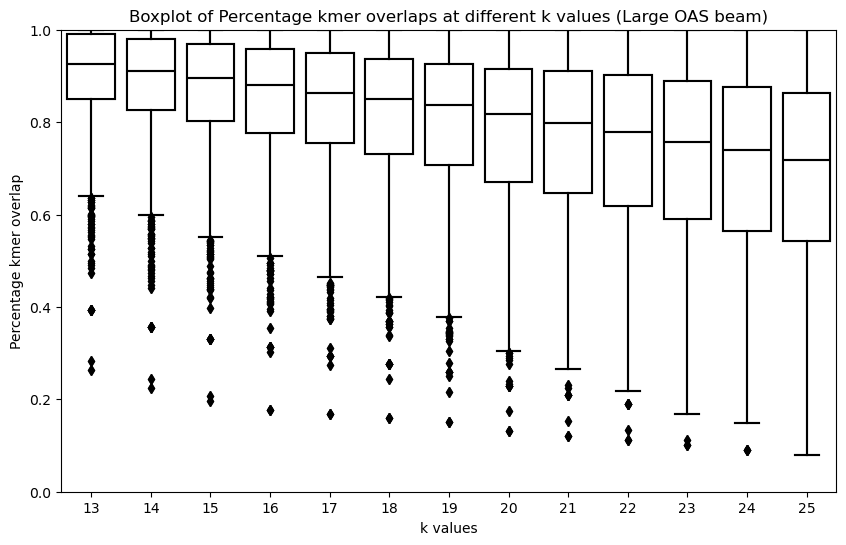

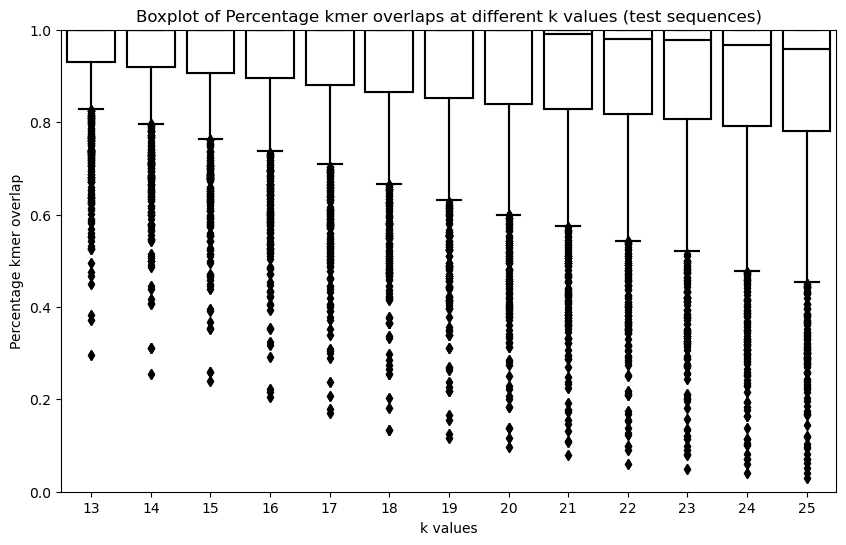

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

boxplot_data = []
k_values = []

# for k, overlaps in enumerate(overlap_small_ft_full, start=3):
#     boxplot_data.extend(overlaps)
#     k_values.extend([k] * len(overlaps))

# # Create the boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=k_values, y=boxplot_data)
# plt.ylim(0, max(boxplot_data))
# plt.xlabel('k values')
# plt.ylabel('Percentage kmer overlap')
# plt.title('Boxplot of Percentage kmer Overlaps at Different k values for (Pretrained on OAS)')
# plt.show()

# boxplot_data = []
# k_values = []

# for k, overlaps in enumerate(overlap_small_ft, start=3):
#     boxplot_data.extend(overlaps)
#     k_values.extend([k] * len(overlaps))

# # Create the boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=k_values, y=boxplot_data)
# plt.ylim(0, max(boxplot_data))
# plt.xlabel('k values')
# plt.ylabel('Percentage kmer overlap')
# plt.title('Boxplot of Percentage kmer Overlaps at Different k values (Pretrained on Canine)')
# plt.show()

# boxplot_data = []
# k_values = []

for k, overlaps in enumerate(overlap_small_ft_only, start=0):
    boxplot_data.extend(overlaps)
    k_values.extend([k] * len(overlaps))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=boxplot_data)
plt.ylim(0, max(boxplot_data))

plt.xlabel('k values')
plt.ylabel('Percentage kmer overlap')
plt.title('Boxplot of Percentage kmer overlaps at different k values (Large OAS beam)')
# plt.xticks(ticks=range(0, 12), labels=)
ax = sns.boxplot(x=k_values, y=boxplot_data, color='black', boxprops=dict(facecolor='white'))
ax.set_xticklabels([str(i) for i in range(13, 26)])

boxplot_data = []
k_values = []

for k, overlaps in enumerate(overlap_natural, start=0):
    boxplot_data.extend(overlaps)
    k_values.extend([k] * len(overlaps))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=boxplot_data)
plt.ylim(0, max(boxplot_data))
plt.xlabel('k values')
plt.ylabel('Percentage kmer overlap')
plt.title('Boxplot of Percentage kmer overlaps at different k values (test sequences)')
ax = sns.boxplot(x=k_values, y=boxplot_data, color='black', boxprops=dict(facecolor='white'))
ax.set_xticklabels([str(i) for i in range(13, 26)])